In [21]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use("ggplot")



['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [23]:
import os
print(os.getcwd())       # shows the working directory
print(os.listdir())      # lists all files in that folder



C:\Users\user
['.anaconda', '.conda', '.condarc', '.continuum', '.gtk-bookmarks', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.swt', '.vscode', '3D Objects', 'Accenture practice.ipynb', 'amazon_jobs_dataset.csv', 'anaconda_projects', 'AppData', 'Application Data', 'assn3.ipynb', 'beautifulsoup.ipynb', 'bmi.ipynb', 'Canine Project.ipynb', 'canine.csv', 'conditionals.ipynb', 'ConditionalsPractice.ipynb', 'Contact.txt', 'contact.txt.txt', 'Contacts', 'conversions.ipynb', 'Cookies', 'CSV Files - 1.ipynb', 'datatypes.ipynb', 'Desktop', 'Documents', 'Downloads', 'Dropbox', 'Expenses.txt', 'Expenses.txt.txt', 'Favorites', 'fileassign.ipynb', 'fileoperations.ipynb', 'filesorter.ipynb', 'find.ipynb', 'for.ipynb', 'functions.ipynb', 'inlighn.ipynb', 'IntelGraphicsProfiles', 'Links', 'lists.ipynb', 'listslicing.ipynb', 'Local Settings', 'matplot.ipynb', 'Microsoft', 'Music', 'My Documents', 'NetHood', 'New Year Sales Data (1).csv', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LO

In [25]:

df = pd.read_csv("New Year Sales Data (1).csv", encoding="latin1")
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [27]:

# Check null values
print(df.isnull().sum())

# Drop unnecessary columns
df = df.drop(["Status", "unnamed1"], axis=1)

# Drop rows with null values in important columns
df = df.dropna()

# Convert Amount to int
df["Amount"] = df["Amount"].astype(int)

df.info()

# Step 4: Data Overview & Summary

# Summary statistics
df.describe()

# Check unique values in each column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")



User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-

1. Gender Analysis

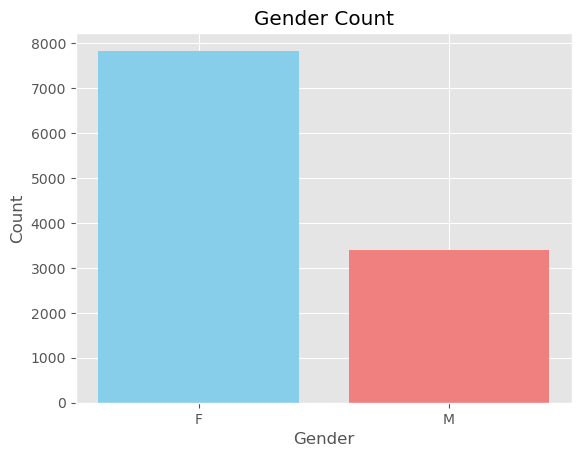

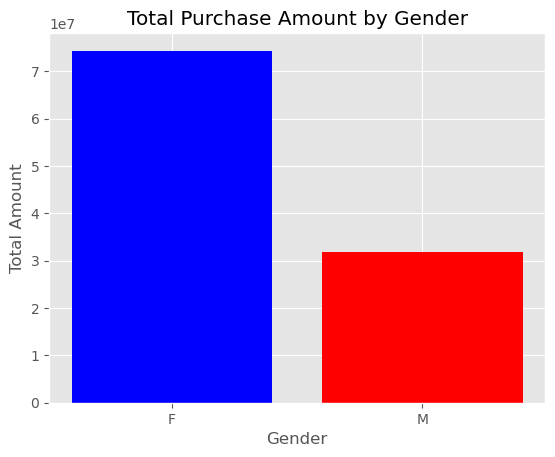

In [29]:
# Count of Gender
gender_counts = df["Gender"].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=["skyblue", "lightcoral"])
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Total purchase amount by gender
sales_by_gender = df.groupby("Gender")["Amount"].sum()

plt.bar(sales_by_gender.index, sales_by_gender.values, color=["blue", "red"])
plt.title("Total Purchase Amount by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Amount")
plt.show()


2. Age Group Analysis

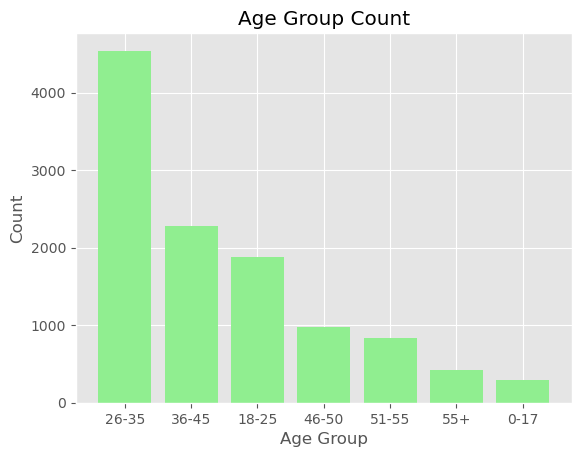

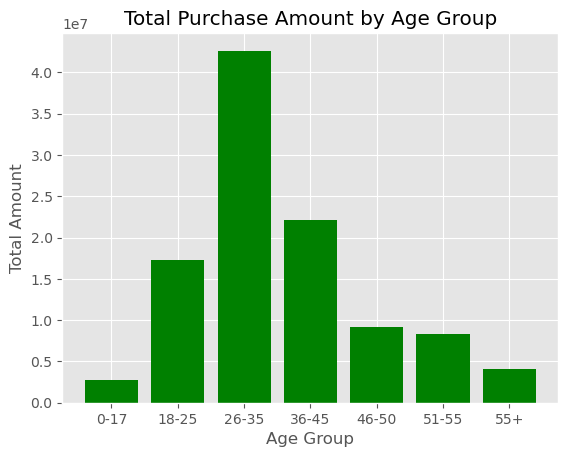

In [31]:
# Count of Age Groups
age_counts = df["Age Group"].value_counts()

plt.bar(age_counts.index, age_counts.values, color="lightgreen")
plt.title("Age Group Count")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

# Total purchase amount by age group
sales_by_age = df.groupby("Age Group")["Amount"].sum()

plt.bar(sales_by_age.index, sales_by_age.values, color="green")
plt.title("Total Purchase Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Amount")
plt.show()


3. State Analysis

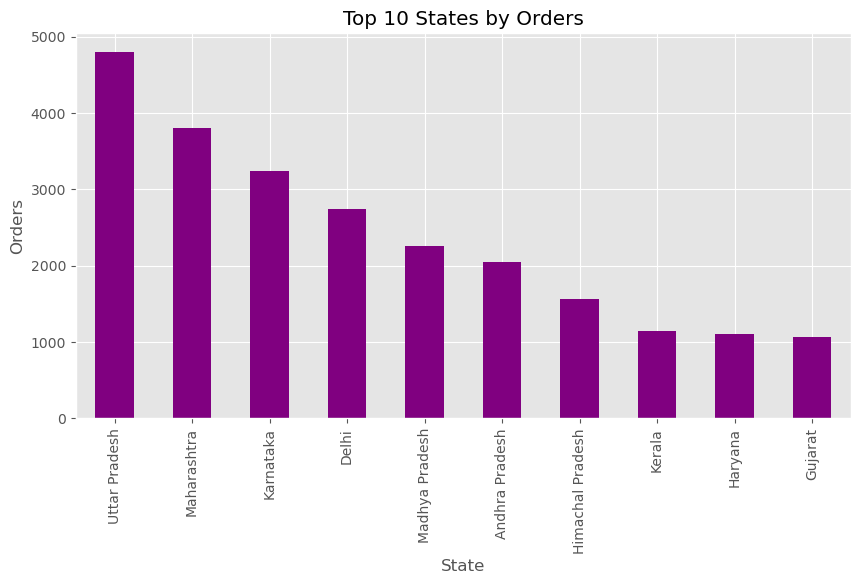

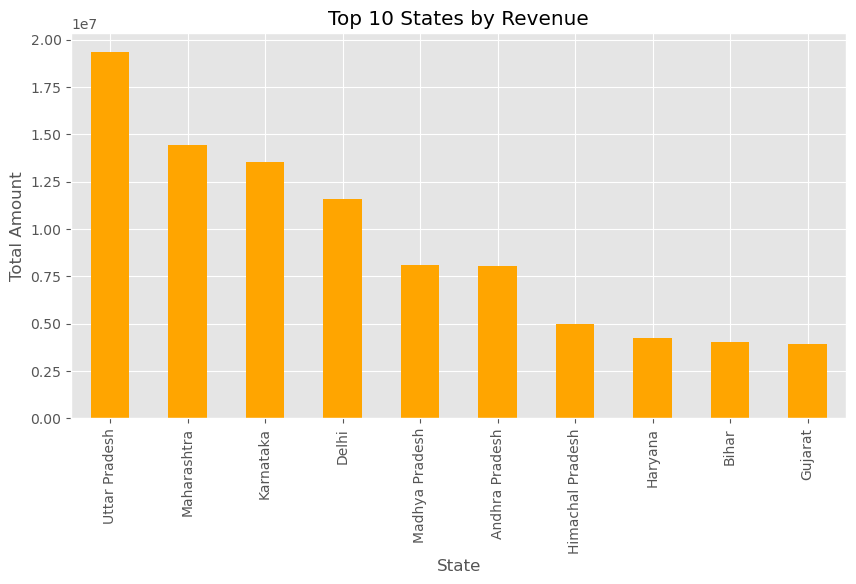

In [33]:
# Top 10 states by orders
orders_by_state = df.groupby("State")["Orders"].sum().sort_values(ascending=False).head(10)

orders_by_state.plot(kind="bar", figsize=(10,5), color="purple")
plt.title("Top 10 States by Orders")
plt.ylabel("Orders")
plt.show()

# Top 10 states by revenue
amount_by_state = df.groupby("State")["Amount"].sum().sort_values(ascending=False).head(10)

amount_by_state.plot(kind="bar", figsize=(10,5), color="orange")
plt.title("Top 10 States by Revenue")
plt.ylabel("Total Amount")
plt.show()


4. Marital Status Analysis

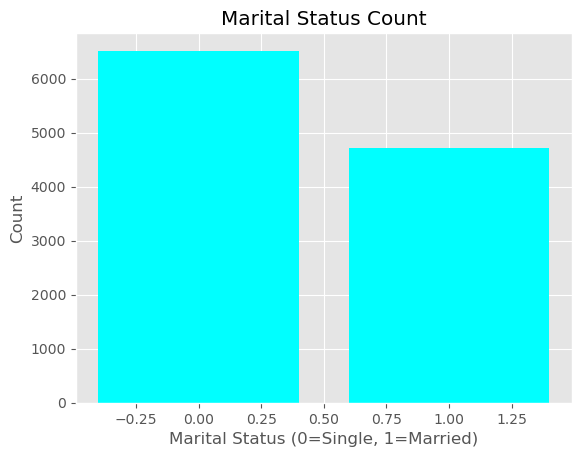

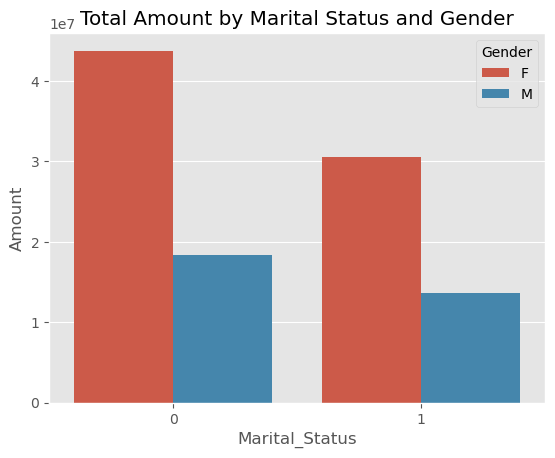

In [35]:
# Count of Marital Status
marital_counts = df["Marital_Status"].value_counts()

plt.bar(marital_counts.index, marital_counts.values, color="cyan")
plt.title("Marital Status Count")
plt.xlabel("Marital Status (0=Single, 1=Married)")
plt.ylabel("Count")
plt.show()

# Total purchase amount by marital status & gender (needs seaborn for grouped bar)
sales_by_marital = df.groupby(["Marital_Status", "Gender"])["Amount"].sum().reset_index()

sns.barplot(x="Marital_Status", y="Amount", hue="Gender", data=sales_by_marital)
plt.title("Total Amount by Marital Status and Gender")
plt.show()


5. Occupation Analysis

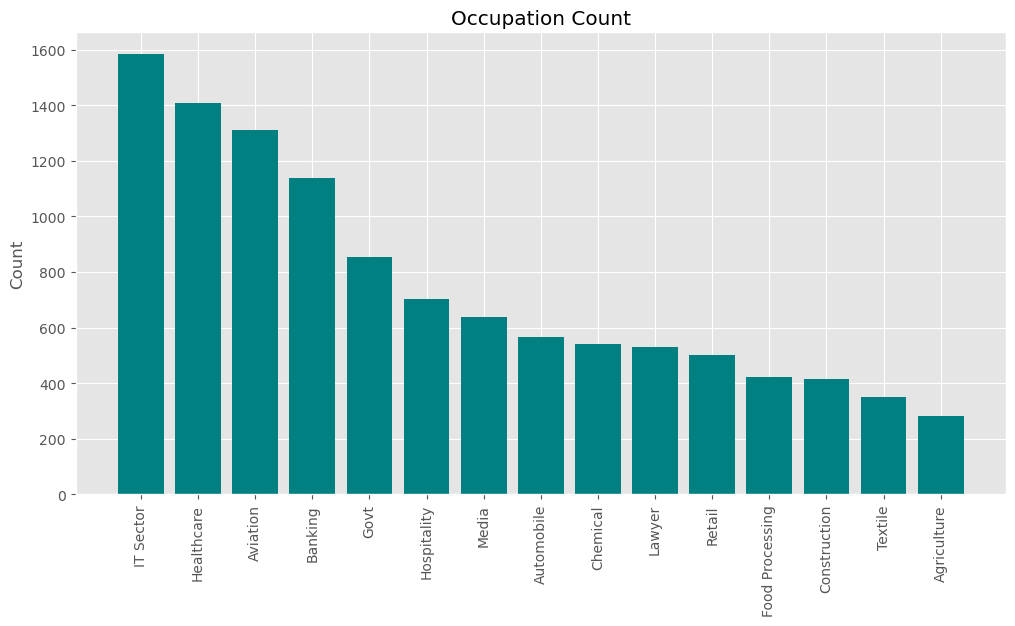

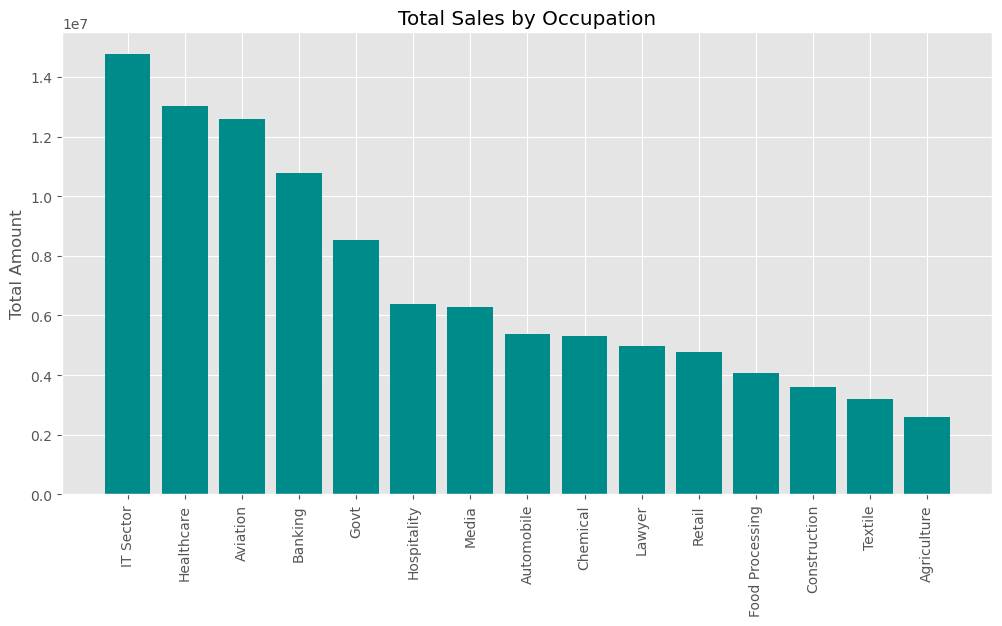

In [37]:
# Count of Occupation
occupation_counts = df["Occupation"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(occupation_counts.index, occupation_counts.values, color="teal")
plt.xticks(rotation=90)
plt.title("Occupation Count")
plt.ylabel("Count")
plt.show()

# Total sales by occupation
sales_by_occ = df.groupby("Occupation")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(sales_by_occ.index, sales_by_occ.values, color="darkcyan")
plt.xticks(rotation=90)
plt.title("Total Sales by Occupation")
plt.ylabel("Total Amount")
plt.show()


6. Product Category Analysis

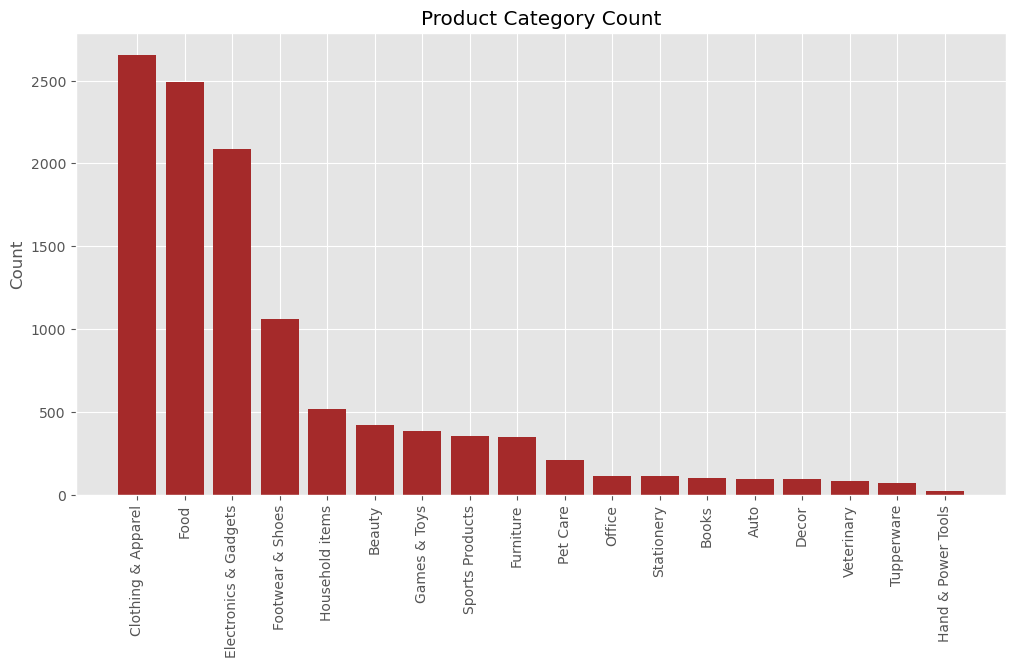

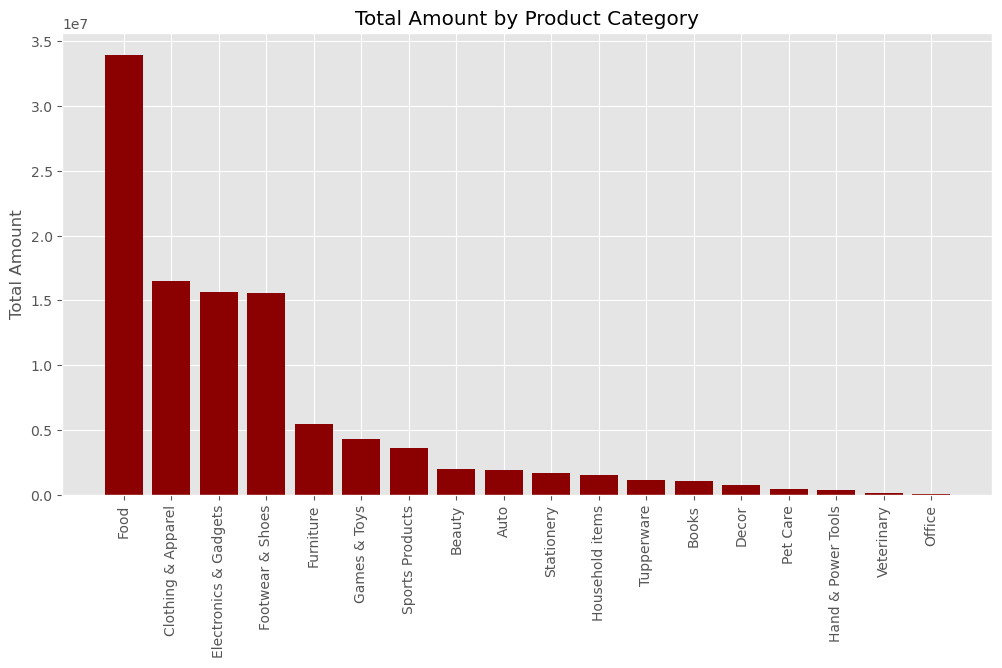

In [39]:
# Count of Product Categories
prod_counts = df["Product_Category"].value_counts()

plt.figure(figsize=(12,6))
plt.bar(prod_counts.index, prod_counts.values, color="brown")
plt.xticks(rotation=90)
plt.title("Product Category Count")
plt.ylabel("Count")
plt.show()

# Total amount by product category
sales_by_cat = df.groupby("Product_Category")["Amount"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
plt.bar(sales_by_cat.index, sales_by_cat.values, color="darkred")
plt.xticks(rotation=90)
plt.title("Total Amount by Product Category")
plt.ylabel("Total Amount")
plt.show()
